In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline

In [3]:
c_rich_MIRA = Table.read('c-rich-mira.csv', format='ascii')
cepheid_data = Table.read('cepheids.csv', format='ascii')
o_rich_MIRA = Table.read('o-rich-list_fixed.csv', format='ascii')

In [9]:
print(len(c_rich_MIRA), len(cepheid_data), len(o_rich_MIRA))

1194 3375 469


### Period-Luminosity relationship?

In [53]:
i_o = o_rich_MIRA['I']
period_o = o_rich_MIRA['P_1']
i_c = c_rich_MIRA['I']
period_c = c_rich_MIRA['P_1']
i_ceph = cepheid_data['I'][cepheid_data['I'] > -80]
period_ceph = cepheid_data['P_1'][cepheid_data['I'] > -80]

In [81]:
sorted_period_o = np.sort(period_o)
m1, b1 = np.polyfit(np.log10(sorted_period_o), i_o, 1)
print(m1, b1)

0.054749000048033736 14.166004623771737


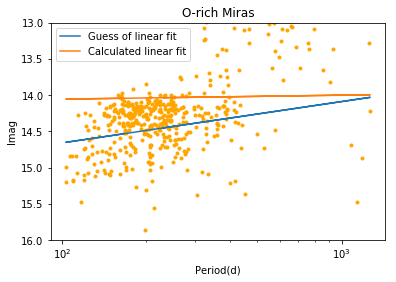

In [82]:
plt.scatter(period_o, i_o, marker='.', color='orange', label=None)
plt.plot(period_o, ((-0.57 * np.log10(period_o)) + 15.8)
        , label='Guess of linear fit')
plt.plot(period_o, ((-m1 * np.log10(period_o)) + b1)
        , label='Calculated linear fit')
# print(m, b)
plt.title('O-rich Miras')
plt.xlabel('Period(d)')
plt.ylabel('Imag')
plt.ylim(16, 13) # for inverting the axis of the plot
plt.xscale('log')
plt.legend(loc='best')
plt.savefig('images/o-rich-mira_lmc_log', bbox_inches='tight')

In [76]:
sorted_period_c = np.sort(period_c)
m, b = np.polyfit(np.log10(sorted_period_c), i_c, 1)
print(m, b)

-0.29934344881744696 16.94370985760304


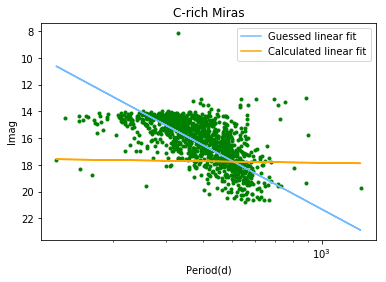

In [104]:
plt.scatter(period_c, i_c, marker='.', color='green'
           , label=None)
plt.plot(period_c, (12 * np.log10(period_c)) - 14.7
        , label='Guessed linear fit'
        , color='xkcd:sky blue')
plt.plot(period_c, (-m * np.log10(period_c)) + b
        , label='Calculated linear fit'
        , color='orange')
plt.title('C-rich Miras')
plt.xlabel('Period(d)')
plt.ylabel('Imag')
plt.xscale('log')
plt.ylim(plt.ylim()[::-1]) # for inverting the axis of the plot
plt.legend(loc='best')
plt.savefig('images/c-rich-mira_lmc', bbox_inches='tight')

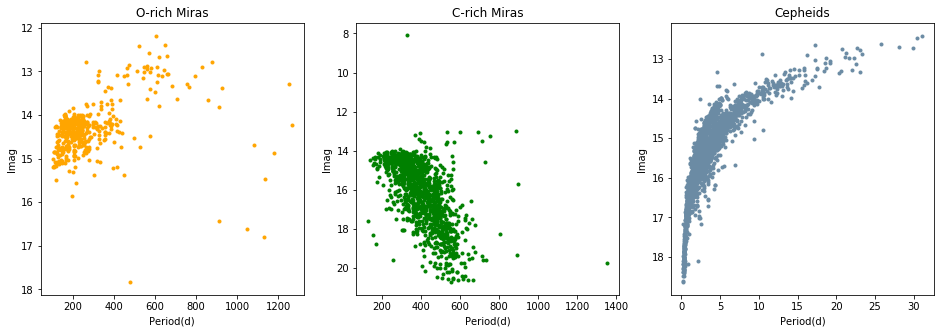

In [7]:
fig,ax = plt.subplots(1, 3)
fig.set_size_inches(16, 5)

i_o = o_rich_MIRA['I']
period_o = o_rich_MIRA['P_1']
i_c = c_rich_MIRA['I']
period_c = c_rich_MIRA['P_1']
i_ceph = cepheid_data['I'][cepheid_data['I'] > -80]
period_ceph = cepheid_data['P_1'][cepheid_data['I'] > -80]

ax[0].scatter(period_o, i_o, marker='.', color='orange')
ax[1].scatter(period_c, i_c, marker='.', color='green')
ax[2].scatter(period_ceph, i_ceph, marker='.'
              , color='xkcd:gray blue')

ax[0].set_title('O-rich Miras')
ax[1].set_title('C-rich Miras')
ax[2].set_title('Cepheids')

ax[0].set_xlabel('Period(d)')
ax[1].set_xlabel('Period(d)')
ax[2].set_xlabel('Period(d)')

ax[0].set_ylabel('Imag')
ax[1].set_ylabel('Imag')
ax[2].set_ylabel('Imag')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

fig.savefig('images/variables_LMC', bbox_inches='tight')

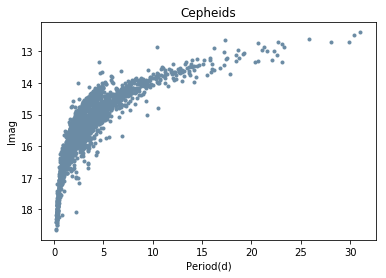

In [8]:
i_ceph = cepheid_data['I'][cepheid_data['I'] > -80]
period_ceph = cepheid_data['P_1'][cepheid_data['I'] > -80]

plt.scatter(period_ceph, i_ceph, marker='.', color='xkcd:gray blue')
plt.xlabel('Period(d)')
plt.ylabel('Imag')
plt.title('Cepheids')
plt.ylim(plt.ylim()[::-1])

plt.savefig('images/lmc_ceph')